# A file to run code pieces separately

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def choose_your_figure():
    variants = ["x", "o"]
    players_choice = 0
    while players_choice not in variants:
        players_choice = input ("Do you want to be X or O? (type x or o) ")
    if players_choice == "x":
        return "X"
    return players_choice

In [ ]:
def another_game ():
    variants = ["y", "n"]
    players_choice = None
    while players_choice not in variants:
        players_choice = input ("Do you want another round? (type y for yes, n for no) ")
    if players_choice == "y":
        return True
    return False

In [ ]:
class Choice:
    def __init__(self, variant, question, a_return=None):
        self.variant = variant
        self.question = question
        self.a_return = a_return

    def players_choice (self):
        players_choice = None
        while players_choice not in self.variant:
            players_choice = input (self.question)
        if self.a_return != None:
            if players_choice == self.variant[0]:
                return self.a_return[0]
            return self.a_return[1]
        return players_choice

figure = Choice(["x", "o"], "Do you want to be X or O? (type x or o) ", ["X", "o"])
another_round = (["y", "n"], "Do you want another round? (type y for yes, n for no) ", [True, False])   
    

In [ ]:
first_player = figure.players_choice()
second_player = "o" if first_player == "X" else "X"
print (first_player, second_player)

In [61]:
def make_fields ():
    fields = {
            "1": {"coordinates": (1,1), "access": True, "figure": "1"},
            "2": {"coordinates": (3,1), "access": True, "figure": "2"},
            "3": {"coordinates": (5,1), "access": True, "figure": "3"},
            "4": {"coordinates": (1,3), "access": True, "figure": "4"},
            "5": {"coordinates": (3,3), "access": True, "figure": "5"},
            "6": {"coordinates": (5,3), "access": True, "figure": "6"},
            "7": {"coordinates": (1,5), "access": True, "figure": "7"},
            "8": {"coordinates": (3,5), "access": True, "figure": "8"},
            "9": {"coordinates": (5,5), "access": True, "figure": "9"}
            }
    return fields

In [62]:
fields = make_fields()
print (fields)

{'1': {'coordinates': (1, 1), 'access': True, 'figure': '1'}, '2': {'coordinates': (3, 1), 'access': True, 'figure': '2'}, '3': {'coordinates': (5, 1), 'access': True, 'figure': '3'}, '4': {'coordinates': (1, 3), 'access': True, 'figure': '4'}, '5': {'coordinates': (3, 3), 'access': True, 'figure': '5'}, '6': {'coordinates': (5, 3), 'access': True, 'figure': '6'}, '7': {'coordinates': (1, 5), 'access': True, 'figure': '7'}, '8': {'coordinates': (3, 5), 'access': True, 'figure': '8'}, '9': {'coordinates': (5, 5), 'access': True, 'figure': '9'}}


In [ ]:
def access_fields (fields):
    accessible_fields = []
    for key in fields.keys():
        if fields[key]["access"]:
            accessible_fields.append(key)
    return accessible_fields

In [ ]:
def choose_a_field(fields, player):
    accessible_fields = access_fields(fields)
    field = Choice (variant = accessible_fields, question = f"Accessible fields: {accessible_fields}. Please choose the field to put your figure in. ")
    chosen_field = field.players_choice()
    print (f"Your choice is: {chosen_field}")
    return [chosen_field, player]

In [49]:
def modify_the_field(fields, player):
    move = choose_a_field(fields, player)
    fields[move[0]]["figure"]=move[1]
    fields[move[0]]["access"]= False
    return fields

In [26]:
def find_the_output(fields):
    output = [fields[key]["figure"] for key in fields]
    for index, value in enumerate(output):
        if value.isalpha():
            output[index] = value.upper()
    return (output)

output = find_the_output(fields)
print (output)

['1', '2', '3', '4', '5', '6', '7', '8', '9']


In [63]:
def print_the_field(fields):
    output = find_the_output(fields)
    #lines = ["  ".join(output[:3]), "  ".join(output[3:6]), "  ".join(output [6:])]
    lines = ["  ".join(output[6:]), "  ".join(output[3:6]), "  ".join(output [:3])]
    print ("\n".join(lines))

In [64]:
print_the_field(fields)

7  8  9
4  5  6
1  2  3


In [50]:
fields = modify_the_field(fields, first_player)

Your choice is: 4
{'1': {'coordinates': (1, 5), 'access': True, 'figure': '1'}, '2': {'coordinates': (3, 5), 'access': True, 'figure': '2'}, '3': {'coordinates': (5, 5), 'access': True, 'figure': '3'}, '4': {'coordinates': (1, 3), 'access': True, 'figure': 'X'}, '5': {'coordinates': (3, 3), 'access': True, 'figure': '5'}, '6': {'coordinates': (5, 3), 'access': True, 'figure': '6'}, '7': {'coordinates': (1, 1), 'access': True, 'figure': '7'}, '8': {'coordinates': (3, 1), 'access': True, 'figure': '8'}, '9': {'coordinates': (5, 1), 'access': True, 'figure': '9'}}


In [51]:
def provide_coordinates (fields, player):
    coordinates = []
    for key in fields.keys():
        if fields[key]["figure"] == player:
            coordinates.append(fields[key]["coordinates"])
    print (coordinates)
    return (coordinates)
    

In [52]:
xs = provide_coordinates(fields, first_player)

[(1, 3)]


In [53]:
def plot_the_field (fields, first_player, second_player):
    
    x_player = first_player if first_player == "X" else second_player
    o_player = second_player if x_player == first_player else first_player
    xs = provide_coordinates(fields, x_player)
    os = provide_coordinates(fields, o_player)
    x_xs = [item[0] for item in xs]
    y_xs = [item[1] for item in xs]
    x_os = [item[0] for item in os]
    y_os = [item[1] for item in os]
    plt.scatter (x_xs, y_xs, marker = "X", s = 500)
    plt.scatter (x_os, y_os, marker = "o", s = 500)
    plt.xticks(list(range(0, 7, 2)))
    plt.yticks(list(range(0, 7, 2)))
    plt.grid()
    plt. show()

[(1, 3)]
[]


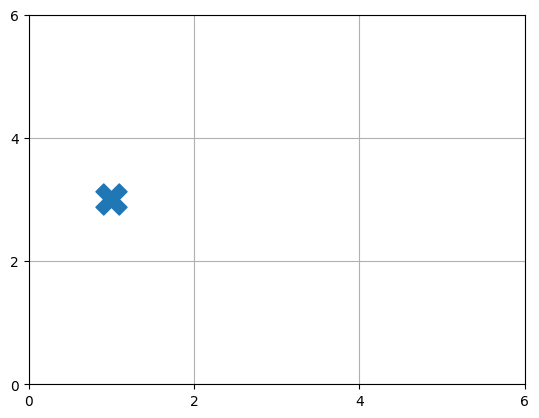

In [55]:
plot_the_field(fields, first_player, second_player)

In [59]:
def is_winner (fields, player):
    conditions = [
        fields["1"]["figure"] == fields["2"]["figure"] == fields["3"]["figure"],
        fields["4"]["figure"] == fields["5"]["figure"] == fields["6"]["figure"],
        fields["7"]["figure"] == fields["8"]["figure"] == fields["9"]["figure"],
        fields["1"]["figure"] == fields["4"]["figure"] == fields["7"]["figure"],
        fields["2"]["figure"] == fields["5"]["figure"] == fields["8"]["figure"],
        fields["3"]["figure"] == fields["6"]["figure"] == fields["9"]["figure"],
        fields["3"]["figure"] == fields["5"]["figure"] == fields["7"]["figure"],
        fields["1"]["figure"] == fields["5"]["figure"] == fields["9"]["figure"],
    ]
    if True in conditions:
        print (f"{player} wins!")
        return True
    return False

    

In [60]:
is_winner (fields, first_player)

False

In [ ]:
def make_move (round, player_whose_turn, fields, second_player):
    print (f"Round {round+1}. {player_whose_turn}'s turn. ")
    print_the_field(fields)
    fields = modify_the_field(fields, player_whose_turn)
    plot_the_field(fields, player_whose_turn, second_player)
    return fields